In [1]:
#professionals have standards...lol
import pandas as pd #to import dataset
import numpy as np #to work with arrays and matrices
from matplotlib import pyplot as py #to visualise the data set

In [2]:
#read train data set
train_data=pd.read_csv("ex1data1.txt")

In [3]:
train_data.head(5)

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#for bias term b
train_data.insert(loc=0,column='bias',value=1)

In [5]:
train_data.head(5)

,bias,x,y
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
train_data.shape

(97, 3)

In [7]:
#type is pandas's DataFrame
type(train_data)

pandas.core.frame.DataFrame

In [8]:
#so converting to numpy
a=np.array(train_data)

In [9]:
a.shape

(97, 3)

In [10]:
#categorise dataset to x,y
x_train=a[:,0:2]
y_train=a[:,2]

In [11]:
print(x_train.shape,y_train.shape)

(97, 2) (97,)


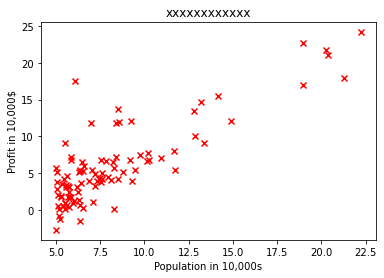

In [12]:
#visualise the data
py.xlabel('Population in 10,000s')
py.ylabel('Profit in 10,000$')
py.title('xxxxxxxxxxxx')
#argumets should be numpy
py.scatter(np.array(x_train[:,1]),np.array(y_train),marker='x',color='r')
py.show()

In [13]:
# x = 97 x 2
# y = 97 x 1

#so theta = 2 x 1

theta=np.zeros((2,1))

In [14]:
theta

array([[0.],
       [0.]])

In [15]:
theta.shape

(2, 1)

In [16]:
m=x_train.shape[0]
#reshaping for computation purpose
y_train=y_train.reshape((m,1))

In [17]:
def compute_cost(theta):
    h=np.dot(x_train,theta)
    cost=1/(2*m) *sum(np.power((h-y_train),2))
    
    return cost

In [18]:
def grad_des(alpha,iterations,theta):
    for i in range(iterations):
        h=np.dot(x_train,theta)
        #should not change theta here itself cuz the nxt stmnt need to find cost
        temp0=theta[0] - ((alpha/m) * sum(h-y_train))
        x_orig=np.reshape(x_train[:,1],(m,1))
        temp1=theta[1] - ((alpha/m) * sum((h -y_train)*x_orig))
        
        theta[0]=temp0
        theta[1]=temp1
        
        cost=compute_cost(theta)
        
    return theta

In [19]:
#alpha,no.of iterations are const decided by us (hyper parameters)
alpha=0.01
iterations=1500
theta=grad_des(alpha,iterations,theta)

In [20]:
print(theta)

[[-3.63029144]
 [ 1.16636235]]


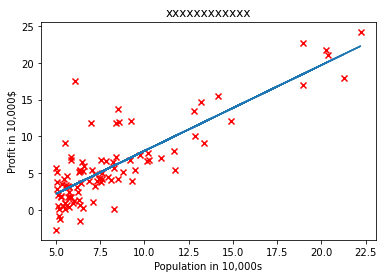

In [21]:
#plot training dataset with regression
py.xlabel('Population in 10,000s')
py.ylabel('Profit in 10,000$')
py.title('xxxxxxxxxxxx')
py.scatter(np.array(x_train[:,1]),np.array(y_train),marker='x',color='r')
py.plot(x_train[:,1],np.dot(x_train,theta))

In [22]:
#train accuracy
y_pred=x_train@theta
error=y_train-y_pred
MSE=np.power(error,2)
print("Accuracy - ",round(100-np.mean(MSE)),"%")

#other evaluation metrics
#precision
#recall
#F1 score (combination of precision and recall)

Accuracy -  91 %
